# Project Name: Web APIs & NLP (Part 2)

## Content:
### 4. Data Cleaning
### 5. Exploratory Data Analysis (EDA)

## 4. Data Cleaning

### Import Libraries

In [1]:
#Import Libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

from bs4 import BeautifulSoup

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load netflix_df and disneyplus_df CSV

* netflix_df : Netflix data
* disneyplus_df : Disneyplus data

In [2]:
netflix_df = pd.read_csv('datasets/Netflix_reddit_submissions.csv')
disneyplus_df = pd.read_csv('datasets/Disneyplus_reddit_submissions.csv')

### Check First 5 Rows of netflix_df

In [3]:
netflix_df.head()

,subreddit,title,selftext,ups,upvote_ratio,num_comments,author,link_flair_text,awards,is_original_content,is_video,post_type,domain,created_utc,pinned,locked,stickied
0,Netflix,/r/Netflix Discord Server,We are pleased to announce we have affiliated ...,427,0.97,181,N3DSdude,Announcement,3,False,False,text,self.netflix,1.619278e+09,False,False,True
1,Netflix,Netflix Announces Plans to Crack Down on Passw...,> **Any post relating to this thread will now ...,666,0.94,3059,UniversallySecluded,Megathread,0,False,False,text,self.netflix,1.675331e+09,False,False,True
2,Netflix,Netflix's live-action adaptation of One Piece ...,NaN,389,0.89,108,dailymail,NaN,0,False,False,link,dailymail.co.uk,1.693906e+09,False,False,False
3,Netflix,Aaron Paul has not received any money for Brea...,NaN,1048,0.92,218,Ben__Harlan,NaN,0,False,False,link,hardwaresfera.com,1.693830e+09,False,False,False
4,Netflix,Why are streaming shows much more downbeat and...,"This is very general I know that, and it actua...",6,0.80,6,Beau_bell,NaN,0,False,False,text,self.netflix,1.693920e+09,False,False,False


### Check First 5 Rows of disneyplus_df

In [4]:
disneyplus_df.head()

,subreddit,title,selftext,ups,upvote_ratio,num_comments,author,link_flair_text,awards,is_original_content,is_video,post_type,domain,created_utc,pinned,locked,stickied
0,Disneyplus,This is the Weekly Tech Support Thread,All posts regarding tech support belong here.\...,3,1.00,20,AutoModerator,:Tech: Tech Support,0,False,False,text,self.DisneyPlus,1.693415e+09,False,False,True
1,Disneyplus,Ahsoka - Episodes 1 and 2 Megathread,Ahsoka is (almost) here!\n\nStart streaming th...,18,0.95,27,anonRedd,:Thread: Mega Thread,0,False,False,text,self.DisneyPlus,1.692730e+09,False,False,True
2,Disneyplus,Marvel Studios’ Loki Season 2 | October 6 on D...,NaN,122,0.97,8,Capital_Gate6718,:Trailer: Official Trailer,0,False,False,link,youtube.com,1.693845e+09,False,False,False
3,Disneyplus,Can I make a specific watchlist on DisneyPlus?,Is there any way I can make a specific watchli...,10,0.92,2,mickieals,:Question: Question,0,False,False,text,self.DisneyPlus,1.693879e+09,False,False,False
4,Disneyplus,Does the windows app have atmos and 4K and HDR?,I was trying to load up the Asoka series and I...,5,1.00,5,Behacad,:Discussion: Discussion,0,False,False,text,self.DisneyPlus,1.693862e+09,False,False,False


### Check Data Type for netflix_df and disneyplus_df CSV

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subreddit            3477 non-null   object 
 1   title                3477 non-null   object 
 2   selftext             2120 non-null   object 
 3   ups                  3477 non-null   int64  
 4   upvote_ratio         3477 non-null   float64
 5   num_comments         3477 non-null   int64  
 6   author               3477 non-null   object 
 7   link_flair_text      219 non-null    object 
 8   awards               3477 non-null   int64  
 9   is_original_content  3477 non-null   bool   
 10  is_video             3477 non-null   bool   
 11  post_type            3477 non-null   object 
 12  domain               3477 non-null   object 
 13  created_utc          3477 non-null   float64
 14  pinned               3477 non-null   bool   
 15  locked               3477 non-null   b

In [6]:
disneyplus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3915 entries, 0 to 3914
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subreddit            3915 non-null   object 
 1   title                3915 non-null   object 
 2   selftext             1967 non-null   object 
 3   ups                  3915 non-null   int64  
 4   upvote_ratio         3915 non-null   float64
 5   num_comments         3915 non-null   int64  
 6   author               3915 non-null   object 
 7   link_flair_text      3729 non-null   object 
 8   awards               3915 non-null   int64  
 9   is_original_content  3915 non-null   bool   
 10  is_video             3915 non-null   bool   
 11  post_type            3915 non-null   object 
 12  domain               3915 non-null   object 
 13  created_utc          3915 non-null   float64
 14  pinned               3915 non-null   bool   
 15  locked               3915 non-null   b

created_utc datatype will be converted into datetime type as we go further into the coding.

### Check Rows and Columns

In [7]:
print(f"Shape for netflix_df dataset; {netflix_df.shape}")
print(f"Shape for disneyplus_df dataset; {disneyplus_df.shape}")

Shape for netflix_df dataset; (3477, 17)
Shape for disneyplus_df dataset; (3915, 17)


Imabalance data is observed, but let's see how many rows of data we have after cleaning and preprocessing the data as we go further into the coding.

### Check Duplicates

In [8]:
# Check duplicates

netflix_df_duplicates = netflix_df.duplicated().sum()
disneyplus_df_duplicates = disneyplus_df.duplicated().sum()

print(f'Total number of duplicated rows for netflix_df dataset : {netflix_df_duplicates}')
print(f'Total number of duplicated rows for disneyplus_df dataset : {disneyplus_df_duplicates}')

Total number of duplicated rows for netflix_df dataset : 227
Total number of duplicated rows for disneyplus_df dataset : 268


The duplicated data will be removed to avoid redundancy that will lead our model to become overfit.

### Identify Null Values

In [9]:
# Function to identify null values of a dataset
# Arguement to parse in will be the variable of the dataset

def print_null_values(topic,dataset):
    # Calculate null value counts
    null_counts = dataset.isnull().sum()
    
    # Filter columns with null values
    columns_with_null_values = null_counts[null_counts > 0]
    
    # Print columns with null values
    print("Columns with null values in", topic,":")
    print(columns_with_null_values)

In [10]:
# Print columns with null values for netflix_df
print_null_values('netflix_df',netflix_df)

Columns with null values in netflix_df :
selftext           1357
link_flair_text    3258
dtype: int64


In [11]:
# Print columns with null values for disneyplus_df
print_null_values('disneyplus_df',disneyplus_df)

Columns with null values in disneyplus_df :
selftext           1948
link_flair_text     186
dtype: int64


Null values were observed in both netflix_df and disneyplus_df dataset.
<br/>
Removal of null values will be prioritzed for selftext as we do not want to remove data from other columns such as "title" that may provide some insights to our analysis.

### Drop Null and Duplicated Values

In [12]:
# Function for data cleaning

# make null value in column selftext become " " , then drop all value contain " "
# drop duplicated rows
# create alltext column and drop title and selftext columns
# create a new column for topic 


# Arguements to parse in will be the variable of the dataset and topic name

def dataset_cleaning (dataset, topic):
    
    # 1. Replace null, [removed] and [deleted] comments with empty space in the selftext column
    dataset["selftext"].fillna("", inplace=True)
    dataset["selftext"].replace("[removed]", "",inplace=True)
    dataset["selftext"].replace("[deleted]", "",inplace=True)
    
    # 2. Drop duplicates in the dataset (might want to drop based on entire columns)
    dataset.drop_duplicates(keep='first', inplace=True)
    
    # 3. Add both title and selftext to form a new column
    dataset["alltext"] = dataset["title"] + " " + dataset["selftext"]
    
    # 4. Drop both title and selftext since there is a consolidated column now
    dataset.drop(["title", "selftext"], axis=1, inplace=True)
    
    # 5. Create a new column for topic
    dataset["topic"] = topic

### Apply dataset_cleaning on netflix_df and disneyplus_df

In [13]:
dataset_cleaning(netflix_df, "Netflix")
dataset_cleaning(disneyplus_df, "Disneyplus")

In [14]:
# Check Rows and Columns after Drop Null and Duplicated Values

print(f"Shape for netflix_df dataset; {netflix_df.shape}")
print(f"Shape for disneyplus_df dataset; {disneyplus_df.shape}")

Shape for netflix_df dataset; (3250, 17)
Shape for disneyplus_df dataset; (3647, 17)


In [15]:
print_null_values('netflix_df',netflix_df)

Columns with null values in netflix_df :
link_flair_text    3031
dtype: int64


In [16]:
print_null_values('disneyplus_df ',disneyplus_df )

Columns with null values in disneyplus_df  :
link_flair_text    186
dtype: int64


No null values were observed in alltext column for both netflix_df and disneyplus_df applying dataset_cleaning.
<br/>
There are also lesser data in both netflix_df and disneyplus_df.
<br/>
<br/>
From:
<br/>
* Shape for netflix_df dataset; (3477, 17)
* Shape for disneyplus_df dataset; (3915, 17)

To:
<br/>
* Shape for netflix_df dataset; (3250, 17)
* Shape for disneyplus_df dataset; (3647, 17)

### Combine netflix_df and disneyplus_df to become a single dataset
* New Dataset: reddit_df

In [17]:
# Combine netflix_df and disneyplus_df by concat
reddit_df = pd.concat([netflix_df, disneyplus_df], axis=0).reset_index(drop=True)

### Mapping 'netflix_df' to 0 and 'disneyplus_df' to 1

In [18]:
# Mapping 'netflix_df' to 0 and 'disneyplus_df' to 1
reddit_df['subreddit'] = reddit_df['subreddit'].map({'Netflix':1,'Disneyplus':0})

### Creating a new column 'char_count' and 'word_count'
* char_count = To count number of characters in a 'alltext' data.
* word_count =  To count number of words in a 'alltext' data.

In [19]:
# Creating a new column 'char_count'
reddit_df['char_count'] = reddit_df['alltext'].map(len)

# Creating new column 'word_count'
reddit_df['word_count'] = reddit_df['alltext'].map(lambda x: len(x.split()))

###

### Check First 5 Rows of reddit_df

In [20]:
reddit_df.head()

,subreddit,ups,upvote_ratio,num_comments,author,link_flair_text,awards,is_original_content,is_video,post_type,domain,created_utc,pinned,locked,stickied,alltext,topic,char_count,word_count
0,1,427,0.97,181,N3DSdude,Announcement,3,False,False,text,self.netflix,1.619278e+09,False,False,True,/r/Netflix Discord Server We are pleased to an...,Netflix,286,43
1,1,666,0.94,3059,UniversallySecluded,Megathread,0,False,False,text,self.netflix,1.675331e+09,False,False,True,Netflix Announces Plans to Crack Down on Passw...,Netflix,1174,145
2,1,389,0.89,108,dailymail,NaN,0,False,False,link,dailymail.co.uk,1.693906e+09,False,False,False,Netflix's live-action adaptation of One Piece ...,Netflix,152,22
3,1,1048,0.92,218,Ben__Harlan,NaN,0,False,False,link,hardwaresfera.com,1.693830e+09,False,False,False,Aaron Paul has not received any money for Brea...,Netflix,66,12
4,1,6,0.80,6,Beau_bell,NaN,0,False,False,text,self.netflix,1.693920e+09,False,False,False,Why are streaming shows much more downbeat and...,Netflix,2014,355


### Check Rows and Columns of reddit_df

In [21]:
print(f"Shape for reddit_df dataset; {reddit_df.shape}")

Shape for reddit_df dataset; (6897, 19)


### Check Data Type for reddit_df

In [22]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6897 entries, 0 to 6896
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   subreddit            6897 non-null   int64  
 1   ups                  6897 non-null   int64  
 2   upvote_ratio         6897 non-null   float64
 3   num_comments         6897 non-null   int64  
 4   author               6897 non-null   object 
 5   link_flair_text      3680 non-null   object 
 6   awards               6897 non-null   int64  
 7   is_original_content  6897 non-null   bool   
 8   is_video             6897 non-null   bool   
 9   post_type            6897 non-null   object 
 10  domain               6897 non-null   object 
 11  created_utc          6897 non-null   float64
 12  pinned               6897 non-null   bool   
 13  locked               6897 non-null   bool   
 14  stickied             6897 non-null   bool   
 15  alltext              6897 non-null   o

### Check Proportion of the data between "Netflix" and "Disneyplus"
* 1 = Netflix
* 0 = Disneyplus

In [23]:
reddit_df["subreddit"].value_counts(normalize = True)

0    0.528781
1    0.471219
Name: subreddit, dtype: float64

With the current data obtained, there is a data imbalance of 5.8%, it is still within 10%. 
<br/>
From here, we can see that F1 is a better metric to use for evaluating our models as compared to accuracy as there might be more data imabalance as the number of posts increases in each of the topics as time passed.

### Convert created_utc to datetime

In [24]:
reddit_df['created_utc'] = pd.to_datetime(reddit_df['created_utc'], unit='s')

### Create 2 more columns year_month and year_month_day

In [25]:
# Extract year-month and year-month-day

reddit_df['year_month'] = reddit_df['created_utc'].dt.to_period('M').dt.to_timestamp()
reddit_df['year_month_day'] = reddit_df['created_utc'].dt.to_period('D').dt.to_timestamp()

In [26]:
#Check data type to ensure reddit_df['created_utc'], reddit_df['year_month'] and reddit_df['year_month_day']
# are datetime data type

reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6897 entries, 0 to 6896
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   subreddit            6897 non-null   int64         
 1   ups                  6897 non-null   int64         
 2   upvote_ratio         6897 non-null   float64       
 3   num_comments         6897 non-null   int64         
 4   author               6897 non-null   object        
 5   link_flair_text      3680 non-null   object        
 6   awards               6897 non-null   int64         
 7   is_original_content  6897 non-null   bool          
 8   is_video             6897 non-null   bool          
 9   post_type            6897 non-null   object        
 10  domain               6897 non-null   object        
 11  created_utc          6897 non-null   datetime64[ns]
 12  pinned               6897 non-null   bool          
 13  locked               6897 non-nul

In [27]:
#Check First 5 Rows of reddit_df for a glimpse of the data

reddit_df.head()

,subreddit,ups,upvote_ratio,num_comments,author,link_flair_text,awards,is_original_content,is_video,post_type,domain,created_utc,pinned,locked,stickied,alltext,topic,char_count,word_count,year_month,year_month_day
0,1,427,0.97,181,N3DSdude,Announcement,3,False,False,text,self.netflix,2021-04-24 15:24:04,False,False,True,/r/Netflix Discord Server We are pleased to an...,Netflix,286,43,2021-04-01,2021-04-24
1,1,666,0.94,3059,UniversallySecluded,Megathread,0,False,False,text,self.netflix,2023-02-02 09:35:27,False,False,True,Netflix Announces Plans to Crack Down on Passw...,Netflix,1174,145,2023-02-01,2023-02-02
2,1,389,0.89,108,dailymail,NaN,0,False,False,link,dailymail.co.uk,2023-09-05 09:21:51,False,False,False,Netflix's live-action adaptation of One Piece ...,Netflix,152,22,2023-09-01,2023-09-05
3,1,1048,0.92,218,Ben__Harlan,NaN,0,False,False,link,hardwaresfera.com,2023-09-04 12:17:51,False,False,False,Aaron Paul has not received any money for Brea...,Netflix,66,12,2023-09-01,2023-09-04
4,1,6,0.80,6,Beau_bell,NaN,0,False,False,text,self.netflix,2023-09-05 13:21:10,False,False,False,Why are streaming shows much more downbeat and...,Netflix,2014,355,2023-09-01,2023-09-05


## 5. Exploratory Data Analysis (EDA)

### Summary statistics: Netflix in reddit_df dataset

In [28]:
reddit_df[reddit_df['subreddit']==1].describe(include='all').T

C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\1576513772.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reddit_df[reddit_df['subreddit']==1].describe(include='all').T
C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\1576513772.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reddit_df[reddit_df['subreddit']==1].describe(include='all').T
C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\1576513772.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Spec

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
subreddit,3250.0,NaN,NaN,NaN,NaT,NaT,1.0,0.0,1.0,1.0,1.0,1.0,1.0
ups,3250.0,NaN,NaN,NaN,NaT,NaT,548.101231,1892.039806,0.0,0.0,5.0,923.75,63063.0
upvote_ratio,3250.0,NaN,NaN,NaN,NaT,NaT,0.688049,0.214917,0.03,0.5,0.65,0.93,1.0
num_comments,3250.0,NaN,NaN,NaN,NaT,NaT,80.252615,245.799432,0.0,4.0,16.0,85.75,9489.0
author,3250,2190,None,204,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
link_flair_text,219,17,[META],107,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
awards,3250.0,NaN,NaN,NaN,NaT,NaT,0.127692,0.594426,0.0,0.0,0.0,0.0,9.0
is_original_content,3250,1,False,3250,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_video,3250,2,False,3175,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_type,3250,2,text,1919,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Summary statistics: Disneyplus in reddit_df dataset

In [29]:
reddit_df[reddit_df['subreddit']==0].describe(include='all').T

C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\3769534504.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reddit_df[reddit_df['subreddit']==0].describe(include='all').T
C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\3769534504.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reddit_df[reddit_df['subreddit']==0].describe(include='all').T
C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\3769534504.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Spec

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
subreddit,3647.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ups,3647.0,NaN,NaN,NaN,NaT,NaT,245.959419,434.677762,0.0,2.0,16.0,429.0,4567.0
upvote_ratio,3647.0,NaN,NaN,NaN,NaT,NaT,0.785558,0.201426,0.23,0.58,0.87,0.97,1.0
num_comments,3647.0,NaN,NaN,NaN,NaT,NaT,30.2051,45.309718,0.0,4.0,12.0,38.0,426.0
author,3647,1728,None,206,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
link_flair_text,3461,92,:Discussion: Discussion,688,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
awards,3647.0,NaN,NaN,NaN,NaT,NaT,0.10255,0.429841,0.0,0.0,0.0,0.0,5.0
is_original_content,3647,1,False,3647,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_video,3647,2,False,3610,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
post_type,3647,2,link,1944,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Posts with the shortest and longest word counts

In [30]:
###  Finding posts with the shortest and longest word counts

#  Posts with the shortest word counts
display(reddit_df.sort_values(by='word_count', ascending=True)[['alltext','subreddit']].head())

#  Posts with the longest word counts
display(reddit_df.sort_values(by='word_count', ascending=False)[['alltext','subreddit']].head())

,alltext,subreddit
6014,WinterFalcon,0
1341,Finally!,1
6472,Confusion,0
3112,Narcos,1
1483,Serious,1


,alltext,subreddit
2980,List of Netflix Originals TV Shows with IMDb R...,1
3512,Ranking All 61 Disney Films After coming from ...,0
4344,Ranking All 61 Disney Films After coming from ...,0
444,Glamorous on Netflix - a review My partner and...,1
802,Glamorous on Netflix - a review My partner and...,1


### Distribution Bar Plot for word_count and char_count for Netflix and Disneyplus

C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\3117525843.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_1]['word_count'], kde=False, label=label1)
C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\3117525843.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

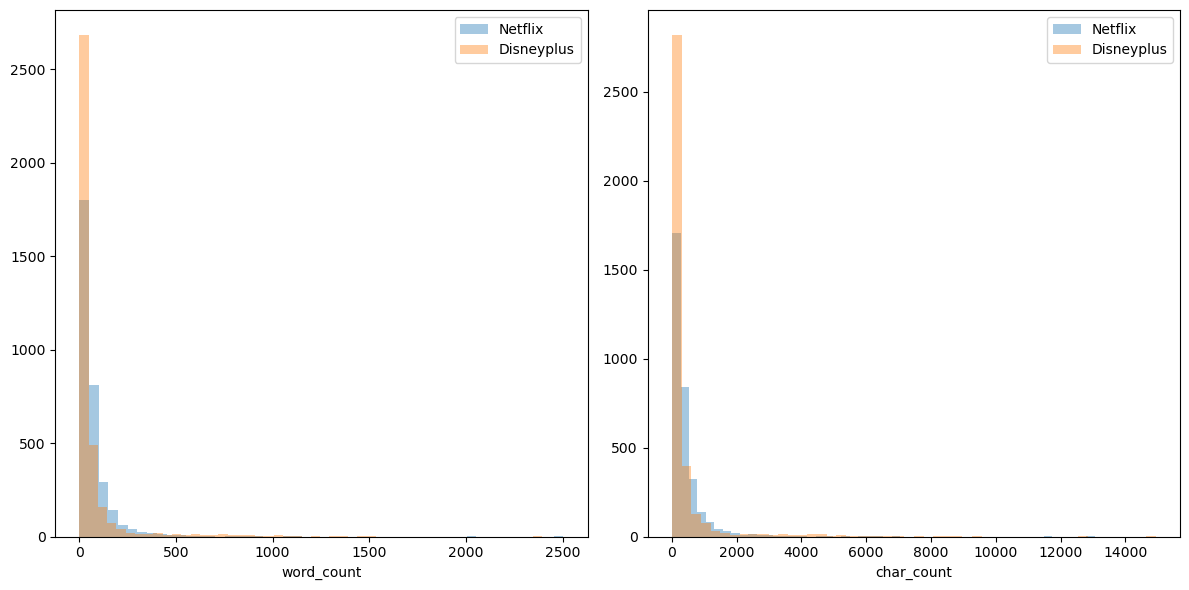

In [31]:
# Function to create Distribution Bar Plot for word_count and char_count for Netflix and Disneyplus
# To parse in dataset, 'subreddit',1, 'Netflix', 0,'Disneyplus'

def plot_distribution(reddit_df, subreddit_col, encode_1, label1, encode_2, label2):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_1]['word_count'], kde=False, label=label1)
    sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_2]['word_count'], kde=False, label=label2)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_1]['char_count'], kde=False, label=label1)
    sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_2]['char_count'], kde=False, label=label2)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_distribution(reddit_df, 'subreddit',1, 'Netflix', 0,'Disneyplus')

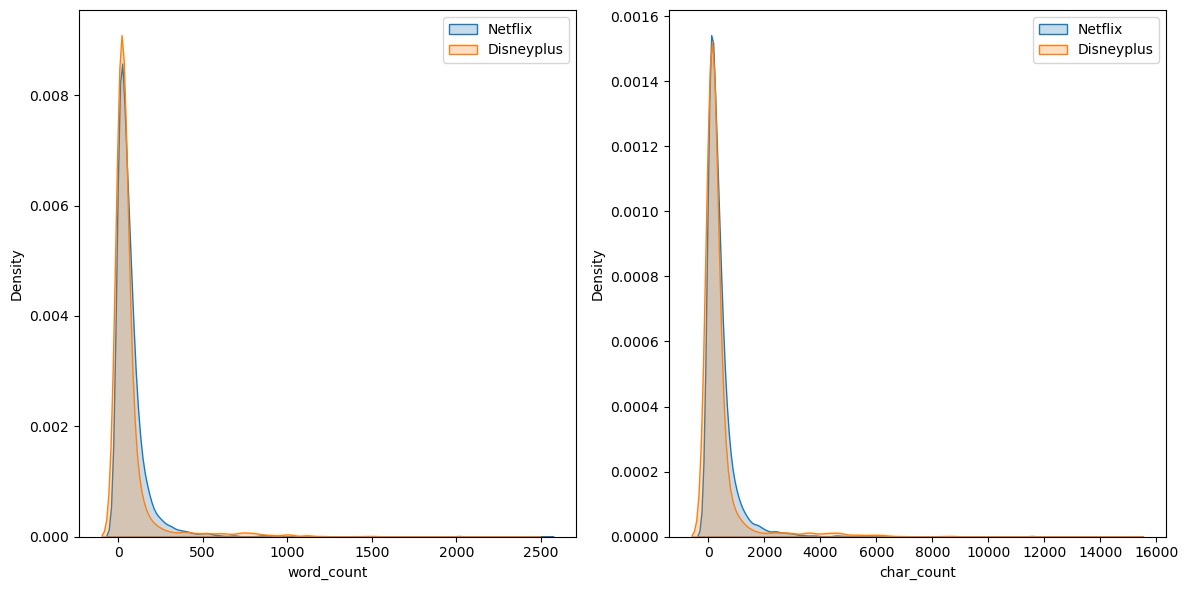

In [32]:
# Function to create Distribution Bar Plot (kde) for word_count and char_count for Netflix and Disneyplus
# To parse in dataset, 'subreddit',1, 'Netflix', 0,'Disneyplus'
def plot_distribution_kde(reddit_df, subreddit_col, encode_1, label1, encode_2, label2):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.kdeplot(reddit_df[reddit_df[subreddit_col] == encode_1]['word_count'], label=label1, fill=True)
    sns.kdeplot(reddit_df[reddit_df[subreddit_col] == encode_2]['word_count'], label=label2, fill=True)
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.kdeplot(reddit_df[reddit_df[subreddit_col] == encode_1]['char_count'], label=label1, fill=True)
    sns.kdeplot(reddit_df[reddit_df[subreddit_col] == encode_2]['char_count'], label=label2, fill=True)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_distribution_kde(reddit_df, 'subreddit', 1, 'Netflix', 0, 'Disneyplus')

* Both distribution bar plot for word_count and char_count are right skewed that indicate the pressence of outliers. 
* Referring to the summary statistic, the mean value for both word_count and char_count are greater than the median value.
* The distribution between Netflix and Disneyplus overlaps each other.
* It is still early to tell if word_count and char_count will make a good feature to distinguish between Netflix and Disneyplus.
* To further analyze after lemmatization and removal of stopwords.

### Line Plots for:
* Number of Post Over Time
* Number of Ups Over Time
* Number of Awards Over Time
* Number of Comments Over Time

In [33]:
# Function to create Distribution Bar Plot (kde) for word_count and char_count for Netflix and Disneyplus

def create_line_plot(dataset, x, y, hue, title, ylabel):
    sns.set(style="whitegrid")

    # Create the line plot
    plt.figure(figsize=(16, 8))  # Adjust figure size
    sns.lineplot(x=x, y=y, data=dataset, hue=hue)

    # Format x-axis ticks as year-month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


    # Set labels and title
    plt.xlabel('Year-Month')
    plt.ylabel(ylabel)
    plt.title(title)

    # Show the legend
    plt.legend(title=hue, loc='upper left')

    # Show the plot
    plt.show()

In [34]:
# create post_counts to count the number of post by year_month by topic
post_counts = reddit_df.groupby(['year_month', 'topic']).size().reset_index(name='count')

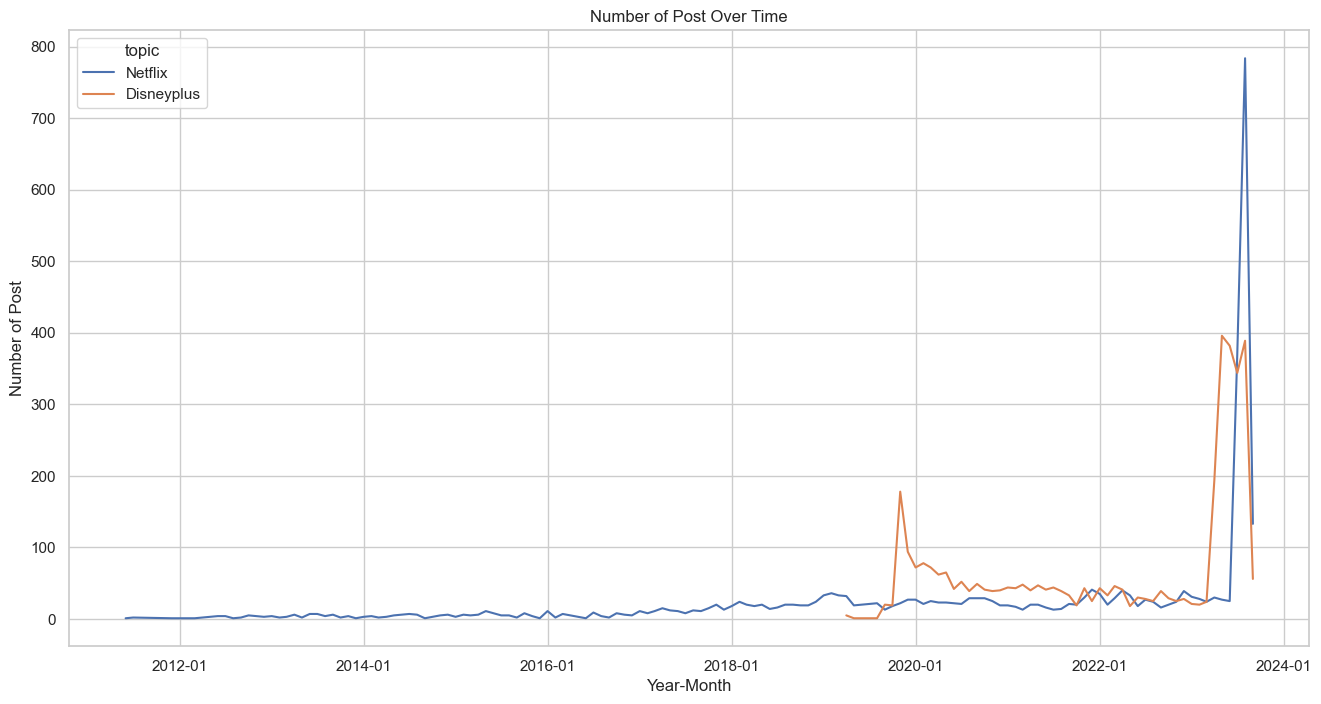

In [35]:
# Number of Post Over Time for "Netflix" and "Disneyplus"

create_line_plot(post_counts, x='year_month', y='count', hue='topic', title='Number of Post Over Time', ylabel='Number of Post')

In [36]:
# Checking which period has the highest number of post by topics

top_counts_by_topic = post_counts.groupby('topic').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)
top_counts_by_topic

,year_month,topic,count
0,2023-05-01,Disneyplus,396
1,2023-08-01,Disneyplus,389
2,2023-06-01,Disneyplus,382
3,2023-07-01,Disneyplus,344
4,2023-04-01,Disneyplus,194
5,2023-08-01,Netflix,784
6,2023-07-01,Netflix,370
7,2023-09-01,Netflix,133
8,2021-12-01,Netflix,41
9,2022-04-01,Netflix,40


* Post for Netflix are available earlier than Disneyplus.
* Disneyplus launched on Nov 2019. Sources: https://thewaltdisneycompany.com/disney-launches-today-and-a-new-era-of-disney-entertainment-begins/
* The spike in the number of posts for Netflix in 2023-08 is likely caused by the release of the show "One Piece" that had many reddit users to interact in the platform.
* The spike in the number of posts for Disneyplus in 2023-05 is likely caused by the release of the show "Secret Invasion" that had many reddit users to interact in the platform.
* There are also more posts in Disneyplus as compared to Netflix after the launch of its streaming platform.

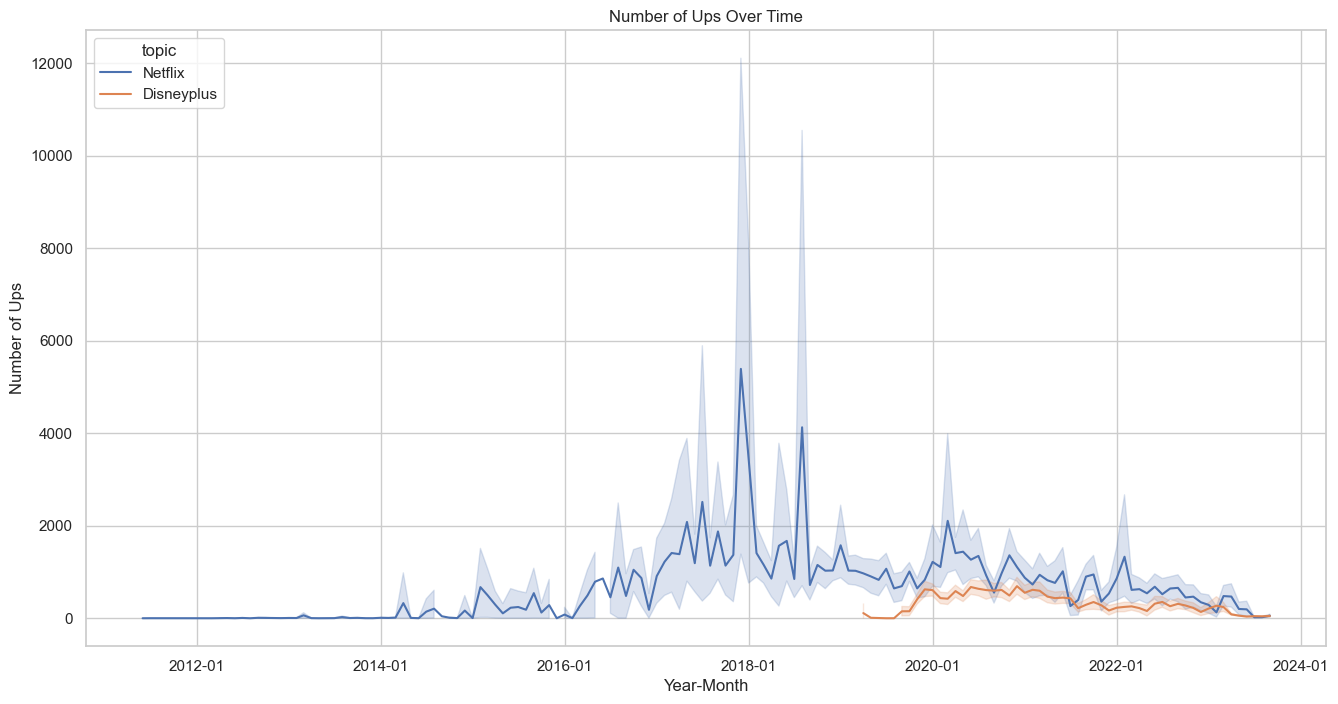

In [37]:
# Number of Ups Over Time for "Netflix" and "Disneyplus"

create_line_plot(reddit_df, x='year_month', y='ups', hue='topic', title='Number of Ups Over Time', ylabel='Number of Ups')

* Although there are more post in Disneyplus, but the number of up votes are lesser than Netflix.

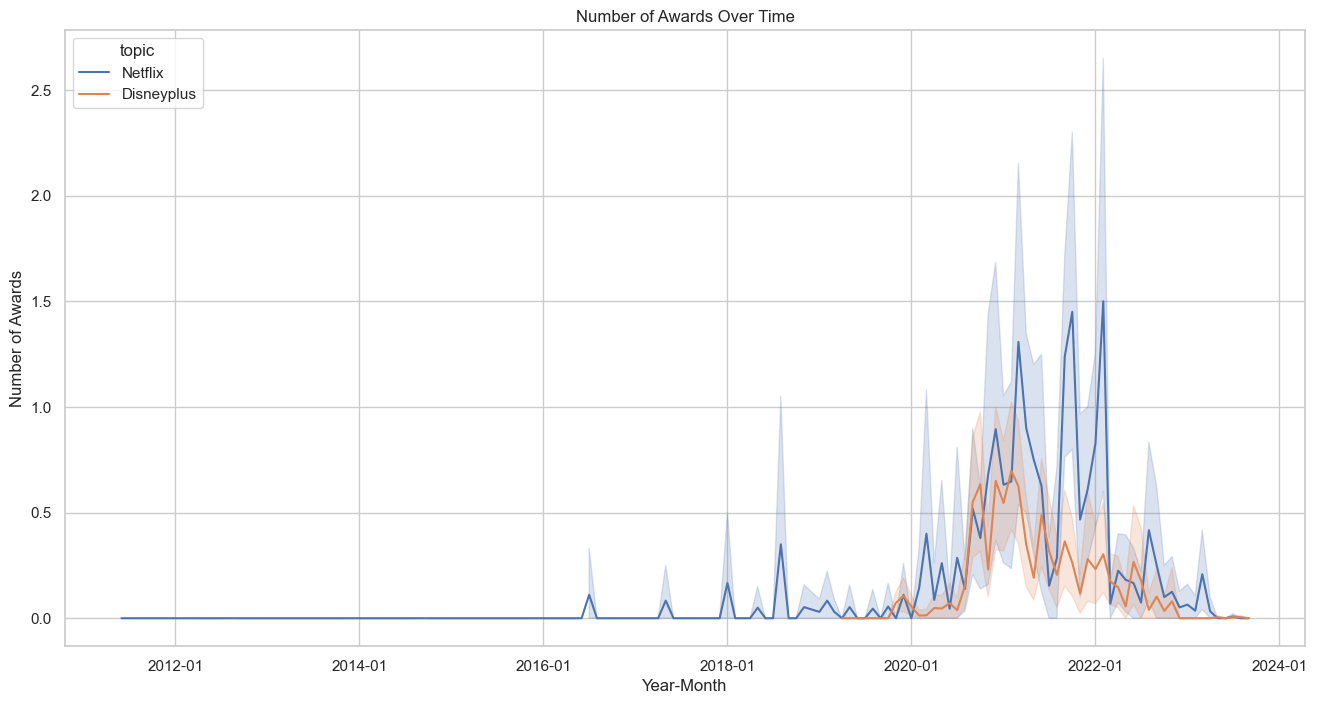

In [38]:
# Number of Awards Over Time for "Netflix" and "Disneyplus"

create_line_plot(reddit_df, x='year_month', y='awards', hue='topic', title='Number of Awards Over Time', ylabel='Number of Awards')

* Recognized posts or comments typically stand out, and those who receive awards may receive special benefits such as Reddit Coins or a brief period of ad-free browsing along with access to the exclusive r/lounge. It's noteworthy that there are fewer awards in the Disneyplus subreddit compared to Netflix even though there are often more posts in Disneyplus subreddit.

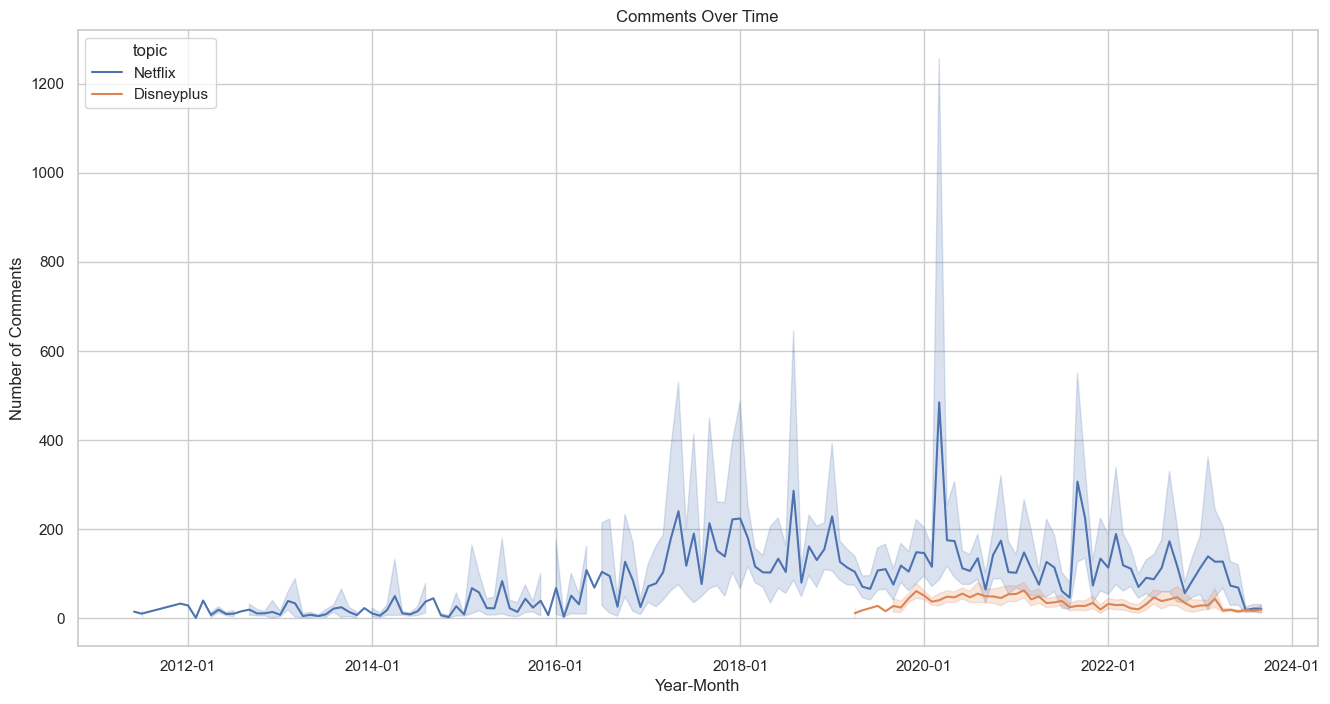

In [39]:
# Number of Comments Over Time for "Netflix" and "Disneyplus"

create_line_plot(reddit_df, x='year_month', y='num_comments', hue='topic', title='Comments Over Time', ylabel='Number of Comments')

* There are also lesser interractions among the reddit users in Disneyplus subreddit

### Boxplots for:
* char_count
* word_count
* ups
* awards
* num_comments

0 = Disneyplus , 1 = Netflix

In [40]:
# Function to create Boxplots

def plot_boxplot(dataframe, columns, titles, title):
    num_plots = len(columns)
    fig, axes = plt.subplots(1, num_plots, figsize=(6*num_plots, 6))
    
    for i, column in enumerate(columns):
        sns.boxplot(data=dataframe, x='subreddit', y=column, ax=axes[i], palette='Paired')
        axes[i].set_title(titles[i], fontsize=14)
        axes[i].ticklabel_format(style='plain', axis='y')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

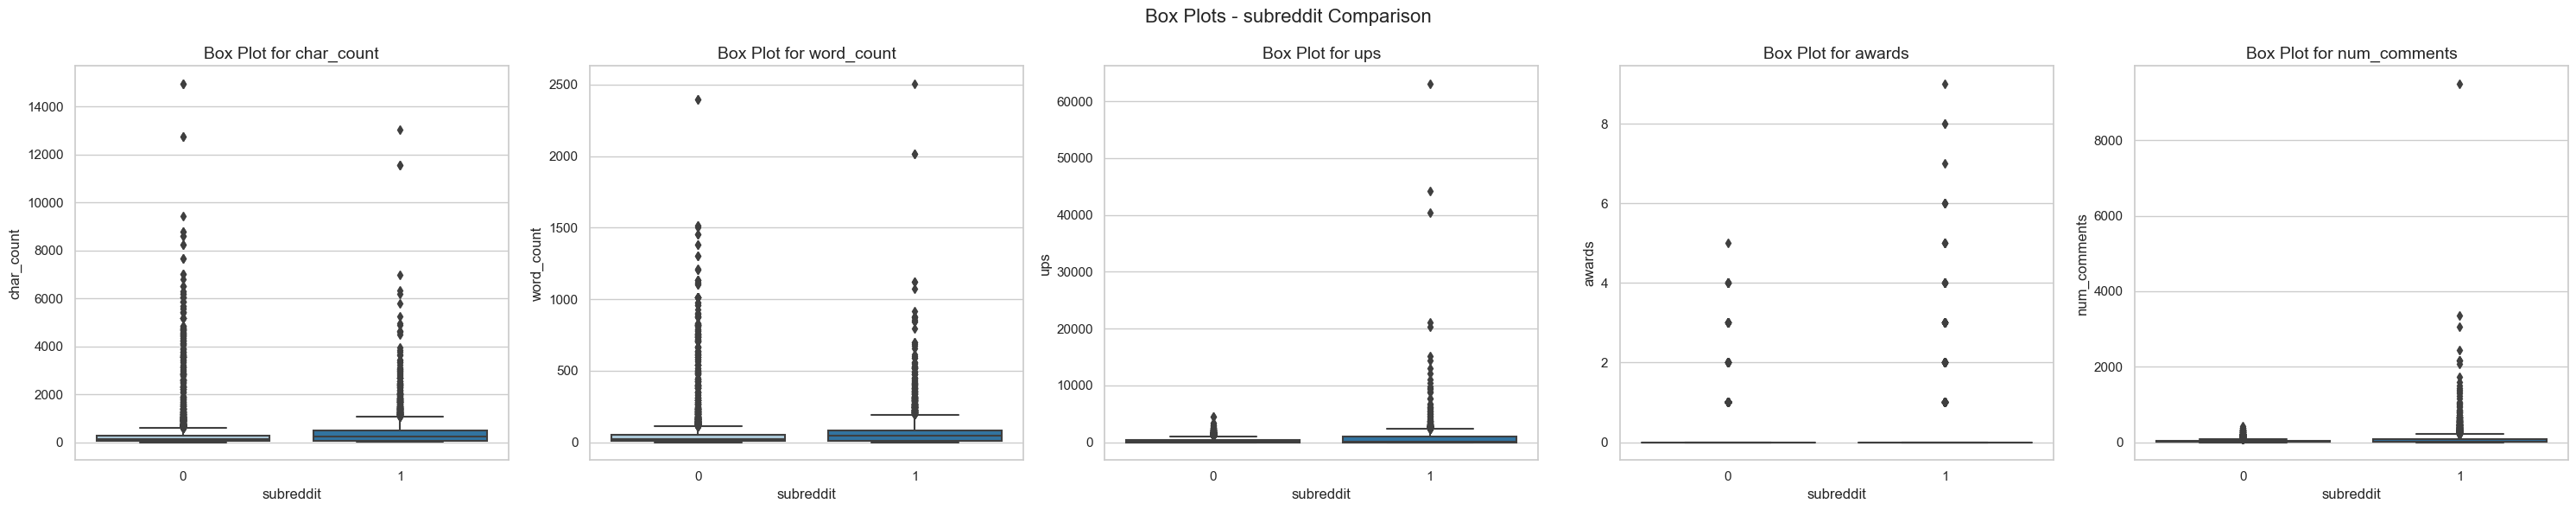

In [41]:
# Plot the Boxplots for:
# char_count
# word_count
# ups
# awards
# num_comments

columns = ['char_count', 'word_count', 'ups', 'awards', 'num_comments']
titles = ['Box Plot for char_count', 'Box Plot for word_count', 'Box Plot for ups', 'Box Plot for awards', 'Box Plot for num_comments']
title = 'Box Plots - subreddit Comparison'

plot_boxplot(reddit_df, columns, titles, title)

#### char_count:
* There are quite a number of outliers in both subreddit topics
* The spread for the Netflix is wider than Disneyplus.
* Netflix subreddit typically type more and longers text in their posts.


#### word_count:
* There are quite a number of outliers in both subreddit topics.
* The spread for the Netflix is wider than Disneyplus.
* Netflix subreddit typically type more text in their posts.

#### ups:
* There are quite a number of outliers in both subreddit topics.
* The spread for the Netflix is wider than Disneyplus.
* The mean number of upvotes for Netflix is higher than Disneyplus
* The median number of upvotes for Netflix is lower than Disneyplus

#### awards:
* There are quite a number of outliers in both subreddit topics.
* The spread for the Netflix comparable Disneyplus.
* The mean and median number of awards are comparable for both Netflix and Disneyplus.

#### num_comments:
* There are quite a number of outliers in both subreddit topics.
* There are more outliers in Netflix than Disneyplus.
* Both mean and median for Netflix is higher than Disneyplus.
* For both subreddit topics, their mean are higher than median value which explained the high values or outliers pulling up the mean values.

### Handling Outliers
Although there are outliers observed in the charts, but in the absence of a subject matter experts, these data points and their rows will not be dropped or impute to avoid missing out any valuable insights that are not clear to the layman.
For this project, **alltext** data will be valuable for our analysis.

### Preprocess the text

Lemmatization is chosen over stemming because it analyzes the context of a word, transforming it into its essential and meaningful base form. Despite the typically longer processing time compared to stemming, choosing stemming can negatively impact model performance due to its tendency to produce inaccurate meanings and spellings.

POS tagging is also included during Lemmatization because it helps computers understand the structure and meaning of words in sentences.

Removal of Stopwords will help to speed up the analysis as noise is reduced. These process will also hasten and enable us to focus on the important words.

* Pos Tagging
* Lemmatization
* Removal of Stopwords

### Function for Tokenising, Lemmatising, And Removal of Stop Words: clean_and_lem

In [42]:
# Functions for Cleaning, Lemming and Stop Word Removal
def clean_and_lem(raw_chunks):
    # 1. Remove URL links.
    alltext = re.sub(r"http\S+|https\S+", "", raw_chunks, flags=re.MULTILINE)

    # 2. Remove HTML.
    review_text = BeautifulSoup(alltext, "html.parser").get_text()

    # 3. Tokenize.
    tokens = word_tokenize(review_text.lower())

    # 4. Perform POS tagging.
    tagged_tokens = pos_tag(tokens)

    # 5. Lemmatize based on POS tags.
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [
        lemmatizer.lemmatize(token, pos=get_wordnet_pos(pos)) for token, pos in tagged_tokens
    ]

    # 6. Remove non-letter characters.
    lemmatized_text = " ".join(lemmatized_tokens)
    cleaned_text = re.sub("[^a-zA-Z]", " ", lemmatized_text)

    # 7. Remove stopwords.
    stop_words = set(stopwords.words("english"))
    final_tokens = word_tokenize(cleaned_text)
    text = " ".join([word for word in final_tokens if word not in stop_words])

    return text

# Functions for Pos Tagging
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return "a"  # Adjective
    elif treebank_tag.startswith("V"):
        return "v"  # Verb
    elif treebank_tag.startswith("N"):
        return "n"  # Noun
    elif treebank_tag.startswith("R"):
        return "r"  # Adverb
    else:
        return "n"  # Noun if POS tag is not found

### Apply clean_and_lem on reddit_df["alltext"]

In [43]:
reddit_df["alltext"] = reddit_df["alltext"].apply(clean_and_lem)

C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\781210048.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(alltext, "html.parser").get_text()


### Creating a new column 'char_count_lem' and 'word_count_lem'
* char_count_lem = To count number of characters in a 'alltext' data after preprocess the words.
* word_count_lem =  To count number of words in a 'alltext' data after preprocess the words.

In [44]:
# Creating a new column 'char_count_lem'
reddit_df['char_count_lem'] = reddit_df['alltext'].map(len)

# Creating new column 'word_count_lem'
reddit_df['word_count_lem'] = reddit_df['alltext'].map(lambda x: len(x.split()))

### Check reddit_df Data after Preprocessing the text

### Check First 5 Rows

In [45]:
reddit_df.head()

,subreddit,ups,upvote_ratio,num_comments,author,link_flair_text,awards,is_original_content,is_video,post_type,domain,created_utc,pinned,locked,stickied,alltext,topic,char_count,word_count,year_month,year_month_day,char_count_lem,word_count_lem
0,1,427,0.97,181,N3DSdude,Announcement,3,False,False,text,self.netflix,2021-04-24 15:24:04,False,False,True,r netflix discord server pleased announce affi...,Netflix,286,43,2021-04-01,2021-04-24,173,24
1,1,666,0.94,3059,UniversallySecluded,Megathread,0,False,False,text,self.netflix,2023-02-02 09:35:27,False,False,True,netflix announces plan crack password share me...,Netflix,1174,145,2023-02-01,2023-02-02,549,78
2,1,389,0.89,108,dailymail,NaN,0,False,False,link,dailymail.co.uk,2023-09-05 09:21:51,False,False,False,netflix live action adaptation one piece break...,Netflix,152,22,2023-09-01,2023-09-05,114,17
3,1,1048,0.92,218,Ben__Harlan,NaN,0,False,False,link,hardwaresfera.com,2023-09-04 12:17:51,False,False,False,aaron paul receive money break bad netflix,Netflix,66,12,2023-09-01,2023-09-04,42,7
4,1,6,0.80,6,Beau_bell,NaN,0,False,False,text,self.netflix,2023-09-05 13:21:10,False,False,False,stream show much downbeat unhappy general know...,Netflix,2014,355,2023-09-01,2023-09-05,1145,173


### Distribution Bar Plot for word_count and char_count for Netflix and Disneyplus after Preprocessing the Text

C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\4113087401.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_1]['word_count_lem'], kde=False, label=label1)
C:\Users\Lua Yeow Wen\AppData\Local\Temp\ipykernel_3976\4113087401.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

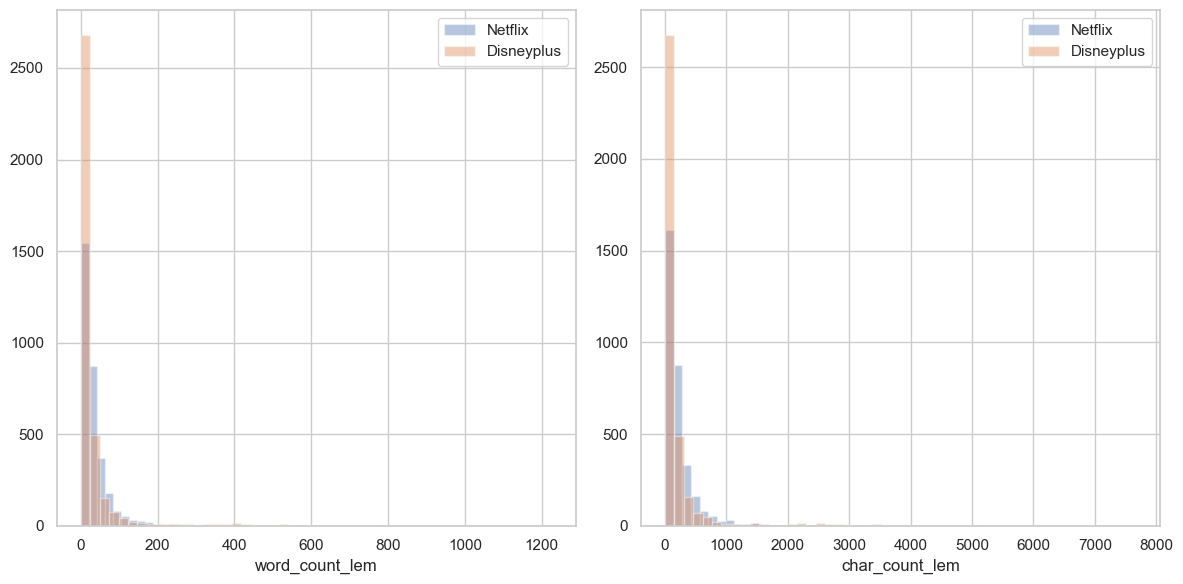

In [46]:
# Function to create Distribution Bar Plot for word_count and char_count for Netflix and Disneyplus
# To parse in dataset, 'subreddit',1, 'Netflix', 0,'Disneyplus'

def plot_distribution_lem(reddit_df, subreddit_col, encode_1, label1, encode_2, label2):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_1]['word_count_lem'], kde=False, label=label1)
    sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_2]['word_count_lem'], kde=False, label=label2)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_1]['char_count_lem'], kde=False, label=label1)
    sns.distplot(reddit_df[reddit_df[subreddit_col] == encode_2]['char_count_lem'], kde=False, label=label2)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_distribution_lem(reddit_df, 'subreddit',1, 'Netflix', 0,'Disneyplus')

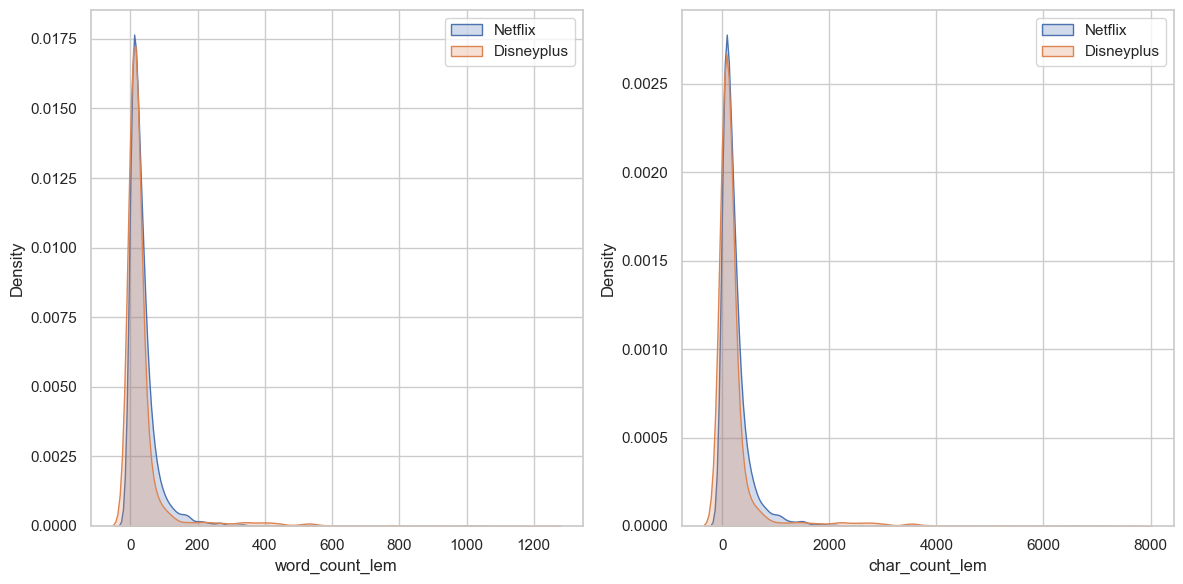

In [47]:
# Function to create Distribution Bar Plot (KDE) for word_count and char_count for Netflix and Disneyplus
# To parse in dataset, 'subreddit',1, 'Netflix', 0,'Disneyplus'

def plot_distribution_kde_lem(reddit_df, subreddit_col, encode_1, label1, encode_2, label2):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.kdeplot(reddit_df[reddit_df[subreddit_col] == encode_1]['word_count_lem'], label=label1, fill=True)
    sns.kdeplot(reddit_df[reddit_df[subreddit_col] == encode_2]['word_count_lem'], label=label2, fill=True)
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.kdeplot(reddit_df[reddit_df[subreddit_col] == encode_1]['char_count_lem'], label=label1, fill=True)
    sns.kdeplot(reddit_df[reddit_df[subreddit_col] == encode_2]['char_count_lem'], label=label2, fill=True)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_distribution_kde_lem(reddit_df, 'subreddit', 1, 'Netflix', 0, 'Disneyplus')

* Both distribution bar plot for word_count and char_count are still right skewed.
* The distribution between Netflix and Disneyplus overlaps each other despite after preprocessing the alltext data.

Word count or char count won’t make a good feature to classify the subreddit topics as the distribution for both Netflix and Disneyplus overlaps each other, making the distinguish impossible.

### Wordcloud

To highlight the most frequently occurring words in a text and grasp key themes or topics.
* Wordcloud for Netflix
* Wordcloud for Disneyplus

### Wordcloud for Netflix

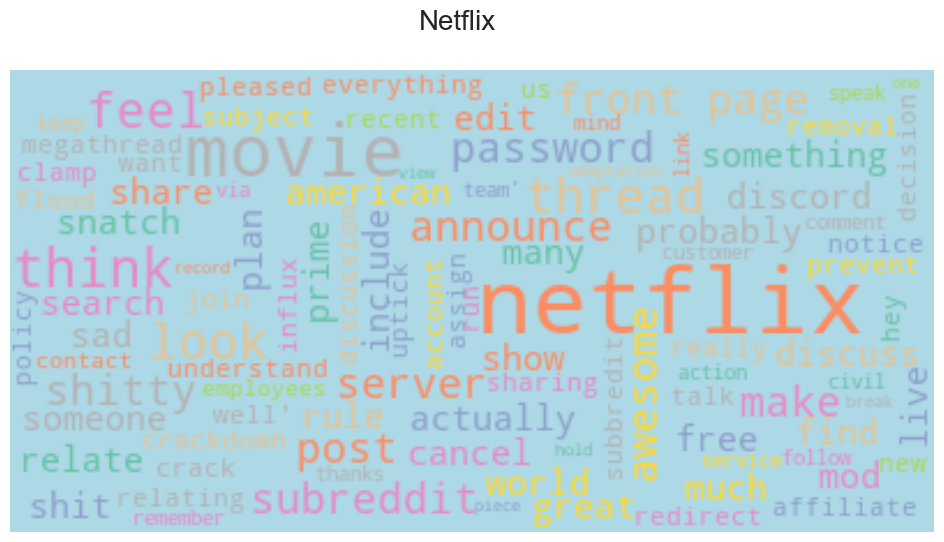

In [48]:
fig = plt.figure(1, figsize=(12, 6))
plt.axis('off')

fig.suptitle("Netflix", fontsize=20)

filtered_df = reddit_df[reddit_df["subreddit"] == 1]

word_cloud = WordCloud(
    background_color = "lightblue",
    max_words=100,
    max_font_size=40,
    colormap="Set2"
).generate(str(filtered_df["alltext"].values))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordcloud for Disneyplus

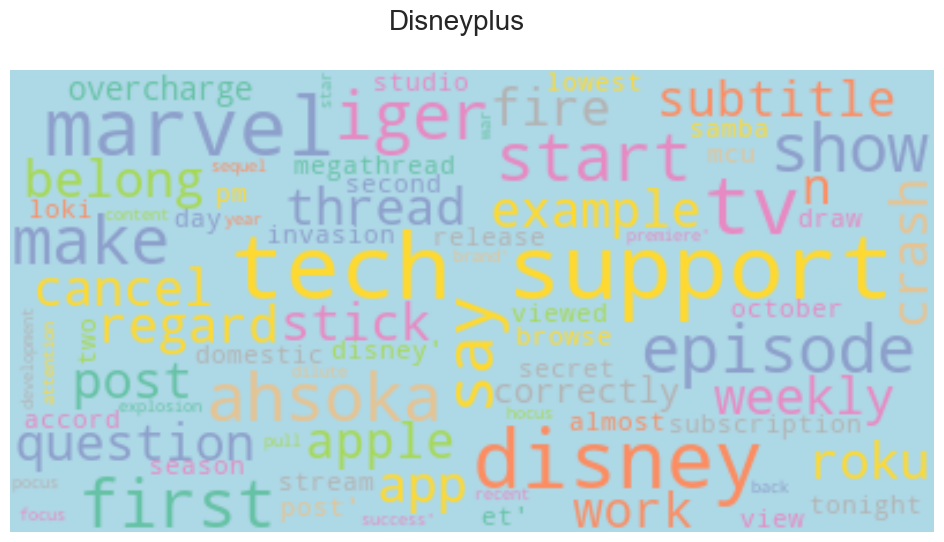

In [49]:
fig = plt.figure(1, figsize=(12, 6))
plt.axis('off')

fig.suptitle("Disneyplus", fontsize=20)

filtered_df = reddit_df[reddit_df["subreddit"] == 0]

word_cloud = WordCloud(
    background_color = "lightblue",
    max_words=100,
    max_font_size=40,
    colormap="Set2"
).generate(str(filtered_df["alltext"].values))

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Some of the noticeable words in the wordcloud for Netflix are:
* netflix
* movie
* think
* feel
* password

Some of the noticeable words in the wordcloud for Disneyplus are:
* disney
* tech
* support
* ahsoka
* tv

Wordcloud can be visually difficult to identify insights as it is an over simplified visual representation.

### Find the top common words
* CountVectorizer Unigrams
* TF-IDF Vectorizer Unigrams

### Unigrams

In [50]:
# Unigrams

#CountVectorizer
cvec_unigrams = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             ngram_range =(1, 1),
                            ) 

cvec_unigrams_netflix = cvec_unigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 1]['alltext'])


cvec_unigrams_netflix_df = pd.DataFrame(cvec_unigrams_netflix.todense(),
                              columns=cvec_unigrams.get_feature_names_out())


cvec_unigrams_disneyplus = cvec_unigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 0]['alltext'])


cvec_unigrams_disneyplus_df = pd.DataFrame(cvec_unigrams_disneyplus.todense(),
                                  columns=cvec_unigrams.get_feature_names_out())
    

            
#TfidfVectorizer
tfid_unigrams = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             ngram_range =(1, 1),
                            ) 

    
tfid_unigrams_netflix = tfid_unigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 1]['alltext'])

tfid_unigrams_netflix_df = pd.DataFrame(tfid_unigrams_netflix.todense(),
                              columns=tfid_unigrams.get_feature_names_out())


tfid_unigrams_disneyplus = tfid_unigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 0]['alltext'])

tfid_unigrams_disneyplus_df = pd.DataFrame(tfid_unigrams_disneyplus.todense(),
                              columns=tfid_unigrams.get_feature_names_out())

In [51]:
# Check shape
print(f"Shape for netflix_df dataset after cvec: {cvec_unigrams_netflix.shape}")
print(f"Shape for netflix_df dataset after tfid: {tfid_unigrams_netflix.shape}")
print(f"Shape for disneyplus_df dataset after cvec: {cvec_unigrams_disneyplus.shape}")
print(f"Shape for disneyplus_df dataset after tfid: {tfid_unigrams_disneyplus.shape}")

Shape for netflix_df dataset after cvec: (3250, 9916)
Shape for netflix_df dataset after tfid: (3250, 9916)
Shape for disneyplus_df dataset after cvec: (3647, 9501)
Shape for disneyplus_df dataset after tfid: (3647, 9501)


In [52]:
def create_subplots(x, y, title):
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Plotting the first graph
    sns.barplot(x=x[0], y=y[0], ax=axes[0, 0], color='royalblue')
    axes[0, 0].set_title(title[0])

    # Plotting the second graph
    sns.barplot(x=x[1], y=y[1], ax=axes[0, 1], color='royalblue')
    axes[0, 1].set_title(title[1])

    # Plotting the third graph
    sns.barplot(x=x[2], y=y[2], ax=axes[1, 0], color='royalblue')
    axes[1, 0].set_title(title[2])

    # Plotting the fourth graph
    sns.barplot(x=x[3], y=y[3], ax=axes[1, 1], color='royalblue')
    axes[1, 1].set_title(title[3])

    # Adjusting the spacing between subplots
    plt.tight_layout()

    # Displaying the plot
    plt.show()

### Unigrams
* CountVectorizer Unigrams
* TF-IDF Vectorizer Unigrams

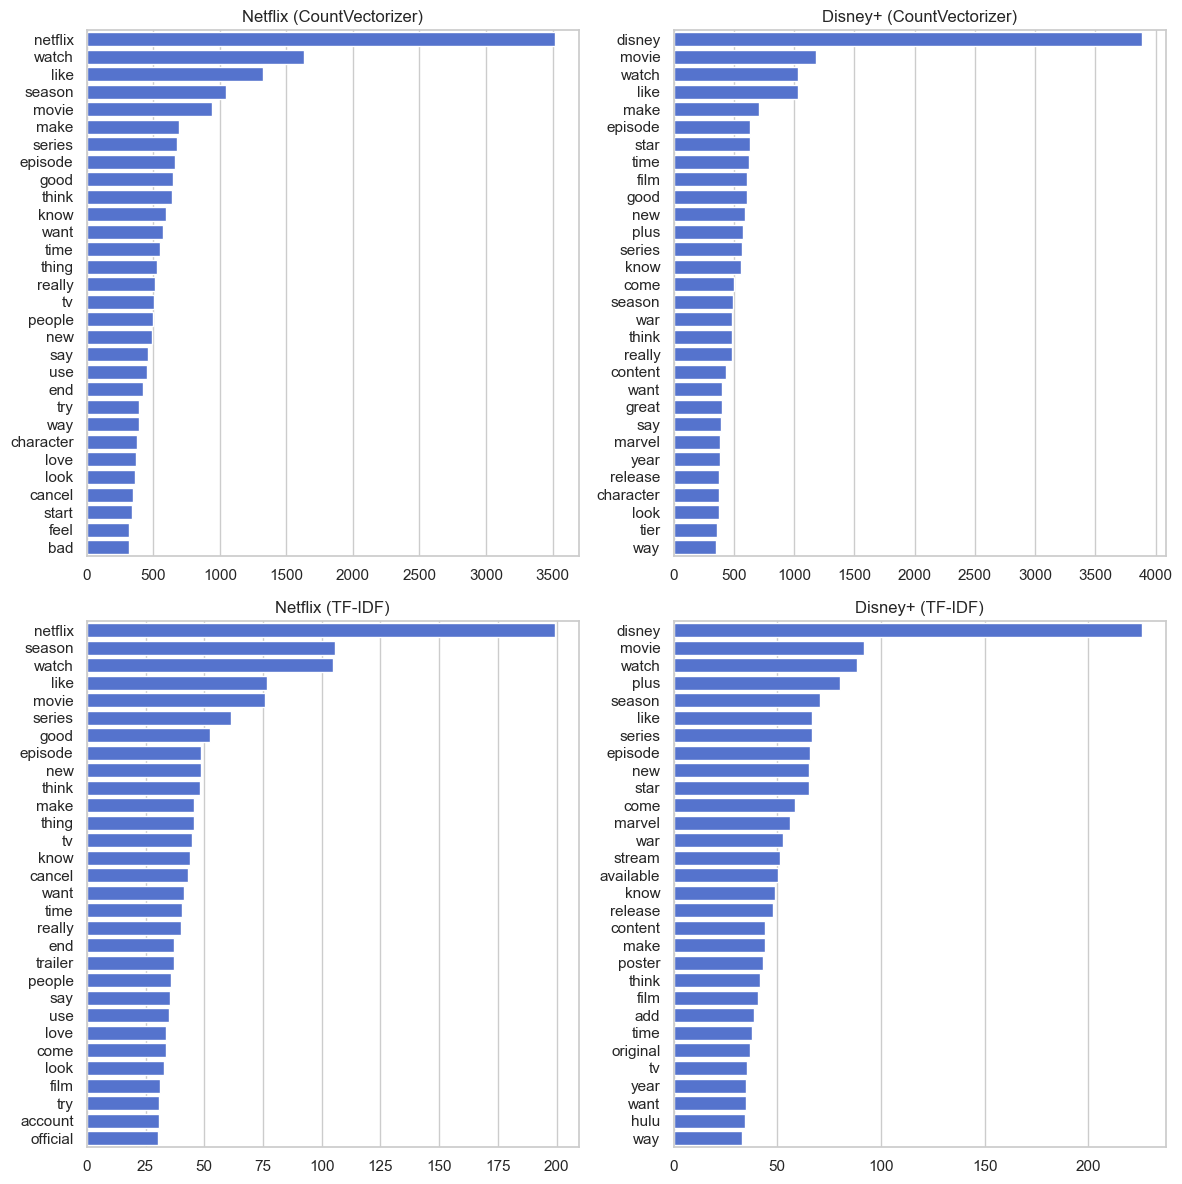

In [53]:
x = [
    cvec_unigrams_netflix_df.sum().sort_values(ascending=False).head(30),
    cvec_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30),
    tfid_unigrams_netflix_df.sum().sort_values(ascending=False).head(30),
    tfid_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)
]

y = [
    cvec_unigrams_netflix_df.sum().sort_values(ascending=False).head(30).index,
    cvec_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30).index,
    tfid_unigrams_netflix_df.sum().sort_values(ascending=False).head(30).index,
    tfid_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30).index
]

titles = [
    "Netflix (CountVectorizer)",
    "Disney+ (CountVectorizer)",
    "Netflix (TF-IDF)",
    "Disney+ (TF-IDF)"
]

create_subplots(x, y, titles)

### Superimpose Both Subreddit Topics: CountVectorizer Unigrams

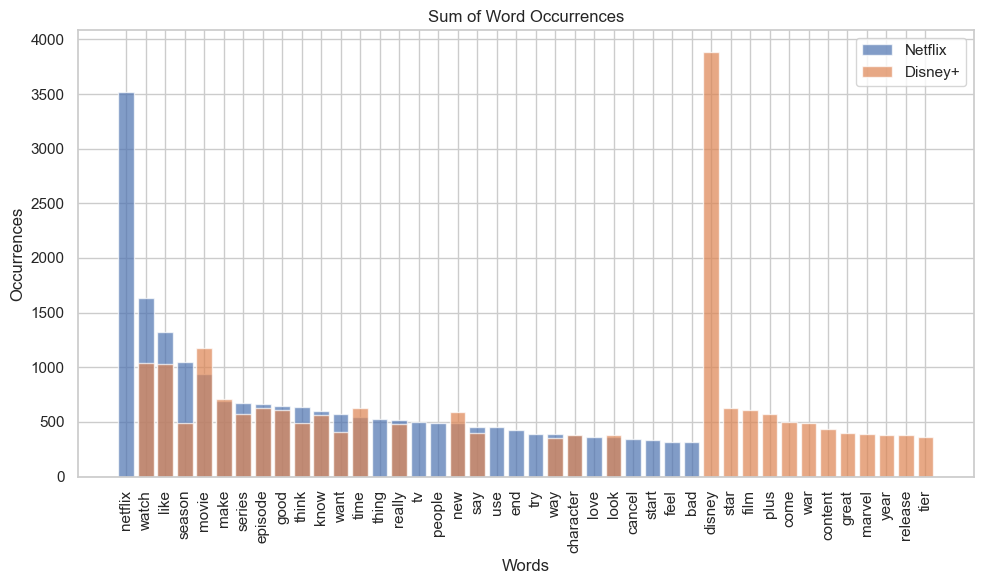

In [54]:
# Calculate the sum of word occurrences
netflix_sum = cvec_unigrams_netflix_df.sum().sort_values(ascending=False).head(30)
disneyplus_sum = cvec_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(netflix_sum.index, netflix_sum.values, alpha=0.7, label='Netflix')
plt.bar(disneyplus_sum.index, disneyplus_sum.values, alpha=0.7, label='Disney+')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Sum of Word Occurrences')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Superimpose Both Subreddit Topics: TF-IDF Vectorizer Unigrams

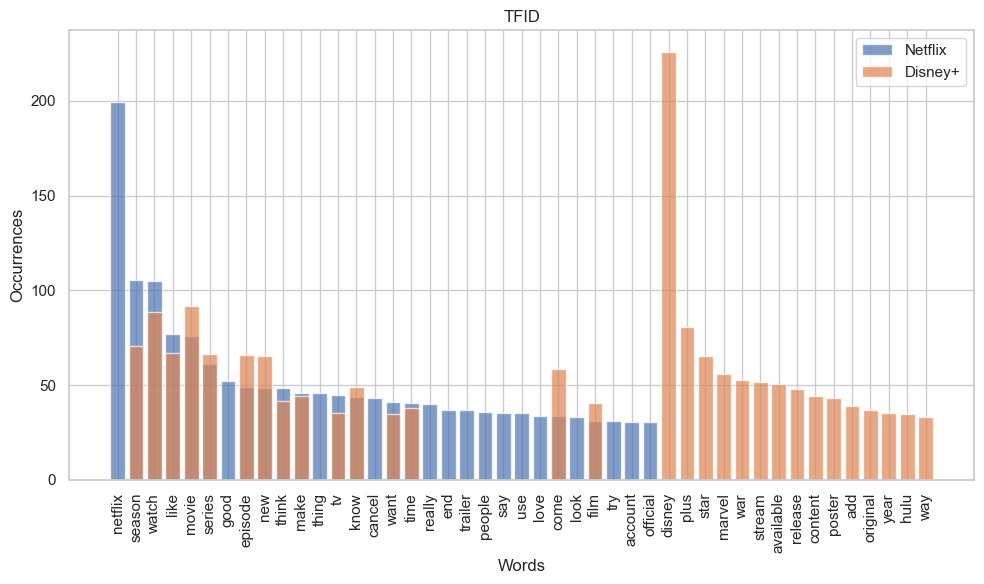

In [55]:
# Calculate the sum of word tfid
netflix_sum = tfid_unigrams_netflix_df.sum().sort_values(ascending=False).head(30)
disneyplus_sum = tfid_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(netflix_sum.index, netflix_sum.values, alpha=0.7, label='Netflix')
plt.bar(disneyplus_sum.index, disneyplus_sum.values, alpha=0.7, label='Disney+')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('TFID')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



* There are quite a number of overlapping words in the top 30 most frequent single words among the 2 subreddit topics.
* By putting domain knowledge, the overlapped words are quite generic and does not really relate to any shows from the two streaming companies.
* These overlapped words may cause our model not able to classify the topics well.

Overlapped words: 'watch', 'like', 'season', 'movie', 'make', 'series', 'episode', 'good', 'think', 'know', 'want', 'time', 'really', 'new', 'say', 'way', 'character', 'look', 'firm'

* Hence, these overlapped words will be removed before we analyze the unigram again, followed by bigram.

### Enhancing the list of stopwords from Count Vectorizer

The overlapped words will be removed so that we can do better analysis and modelling.
This will also enhance the processing speed of the machine learning model.

In [56]:
# To get the base stopwords
stopwords_base = CountVectorizer(stop_words='english').get_stop_words()

In [57]:
#extrawords based on Count Vectorizer as count vectorizer looks at the count of words occurences literally
extra_words = ['watch',
              'like',
              'season',
              'movie',
              'make',
              'series',
              'episode',
              'good',
              'think',
              'know',
              'want',
              'time',
              'really',
              'new',
              'say',
              'way',
              'character',
              'look',
              'firm']

In [58]:
# Combine stopwords_base and extra_words
stopwords_enhanced = set(stopwords_base).union(extra_words)
stopwords_enhanced = list(stopwords_enhanced)

### Find the top common words after stopwords_enhanced
* CountVectorizer Unigrams
* TF-IDF Vectorizer Unigrams

In [59]:
# Unigrams after stopwords_enhanced

#CountVectorizer
cvec_unigrams = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stopwords_enhanced,
                             ngram_range =(1, 1),
                             #max_features = 10000
                            ) 

cvec_unigrams_netflix = cvec_unigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 1]['alltext'])


cvec_unigrams_netflix_df = pd.DataFrame(cvec_unigrams_netflix.todense(),
                              columns=cvec_unigrams.get_feature_names_out())


cvec_unigrams_disneyplus = cvec_unigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 0]['alltext'])


cvec_unigrams_disneyplus_df = pd.DataFrame(cvec_unigrams_disneyplus.todense(),
                                  columns=cvec_unigrams.get_feature_names_out())
    

            
#TfidfVectorizer
tfid_unigrams = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stopwords_enhanced,
                             ngram_range =(1, 1),
                             #max_features = 10000
                            ) 

    
tfid_unigrams_netflix = tfid_unigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 1]['alltext'])

tfid_unigrams_netflix_df = pd.DataFrame(tfid_unigrams_netflix.todense(),
                              columns=tfid_unigrams.get_feature_names_out())


tfid_unigrams_disneyplus = tfid_unigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 0]['alltext'])

tfid_unigrams_disneyplus_df = pd.DataFrame(tfid_unigrams_disneyplus.todense(),
                              columns=tfid_unigrams.get_feature_names_out())

In [60]:
# Check shape after stopwords_enhanced
print(f"Shape for netflix_df dataset; {cvec_unigrams_netflix.shape}")
print(f"Shape for netflix_df dataset; {tfid_unigrams_netflix.shape}")
print(f"Shape for disneyplus_df dataset; {cvec_unigrams_disneyplus.shape}")
print(f"Shape for disneyplus_df dataset; {tfid_unigrams_disneyplus.shape}")

Shape for netflix_df dataset; (3250, 9898)
Shape for netflix_df dataset; (3250, 9898)
Shape for disneyplus_df dataset; (3647, 9482)
Shape for disneyplus_df dataset; (3647, 9482)


### Unigrams after stopwords_enhanced
* CountVectorizer Unigrams
* TF-IDF Vectorizer Unigrams

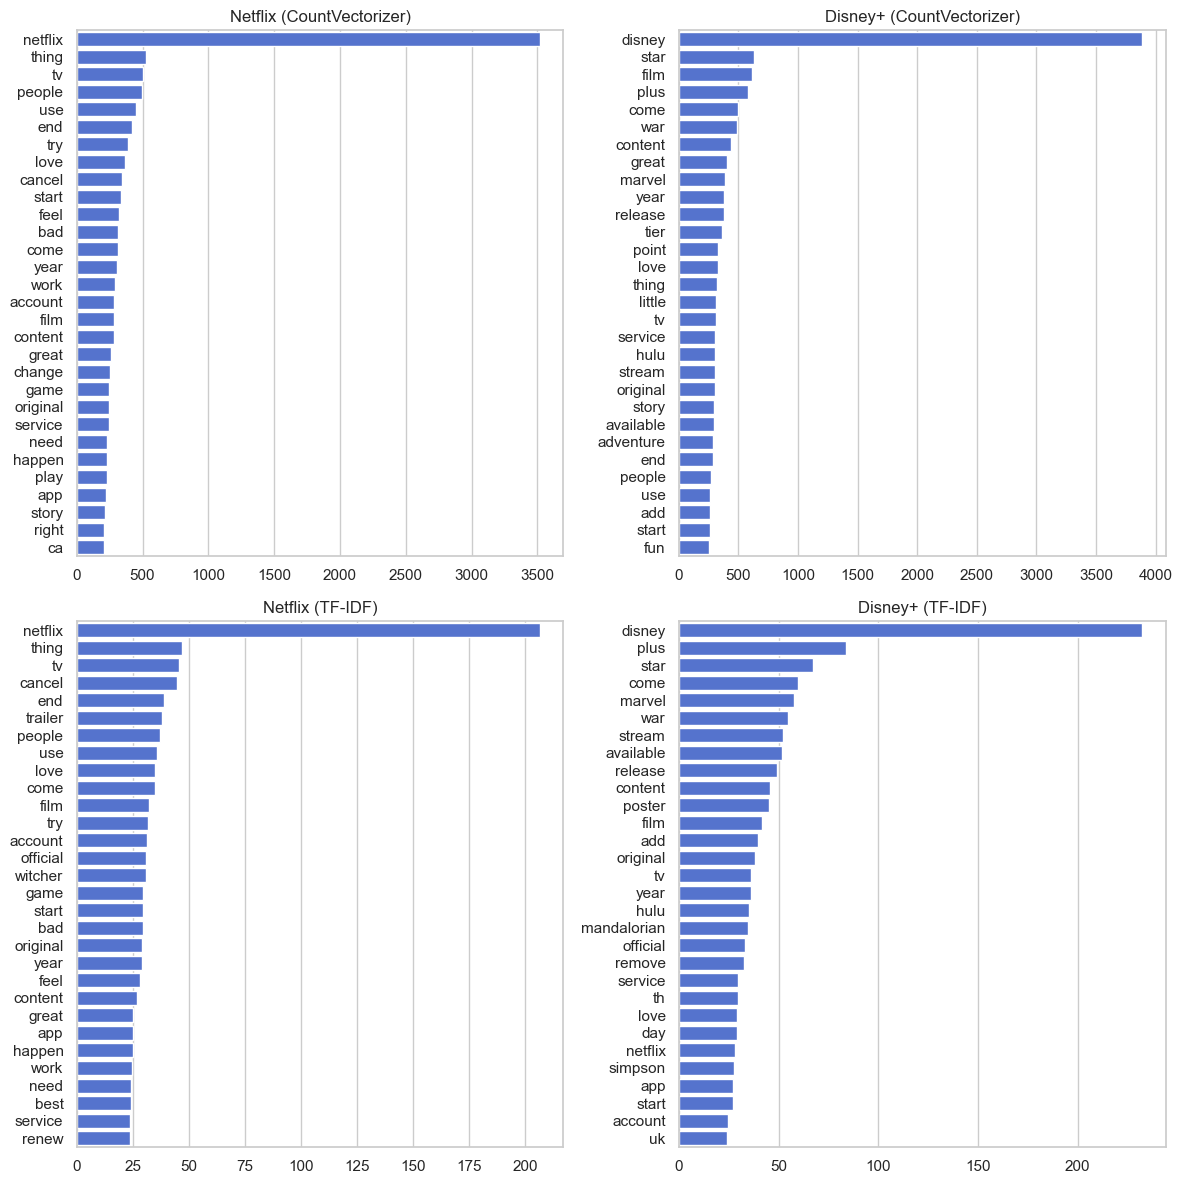

In [61]:
# after stopwords_enhanced
x = [
    cvec_unigrams_netflix_df.sum().sort_values(ascending=False).head(30),
    cvec_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30),
    tfid_unigrams_netflix_df.sum().sort_values(ascending=False).head(30),
    tfid_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)
]

y = [
    cvec_unigrams_netflix_df.sum().sort_values(ascending=False).head(30).index,
    cvec_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30).index,
    tfid_unigrams_netflix_df.sum().sort_values(ascending=False).head(30).index,
    tfid_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30).index
]

titles = [
    "Netflix (CountVectorizer)",
    "Disney+ (CountVectorizer)",
    "Netflix (TF-IDF)",
    "Disney+ (TF-IDF)"
]

create_subplots(x, y, titles)

### Superimpose Both Subreddit Topics: CountVectorizer Unigrams

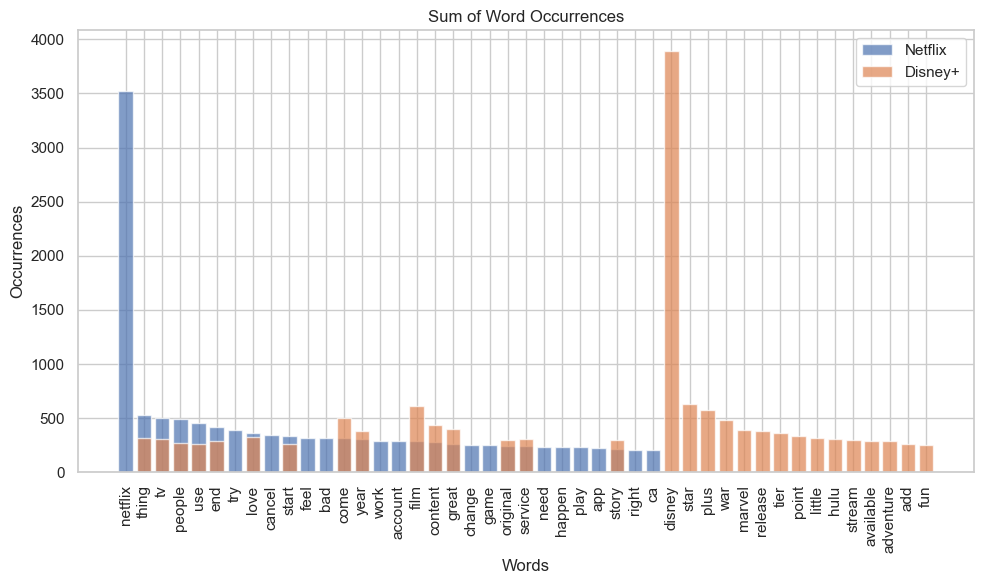

In [62]:
# Calculate the sum of word occurrences after stopwords_enhanced
netflix_sum = cvec_unigrams_netflix_df.sum().sort_values(ascending=False).head(30)
disneyplus_sum = cvec_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(netflix_sum.index, netflix_sum.values, alpha=0.7, label='Netflix')
plt.bar(disneyplus_sum.index, disneyplus_sum.values, alpha=0.7, label='Disney+')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Sum of Word Occurrences')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Superimpose Both Subreddit Topics: TF-IDF Vectorizer Unigrams

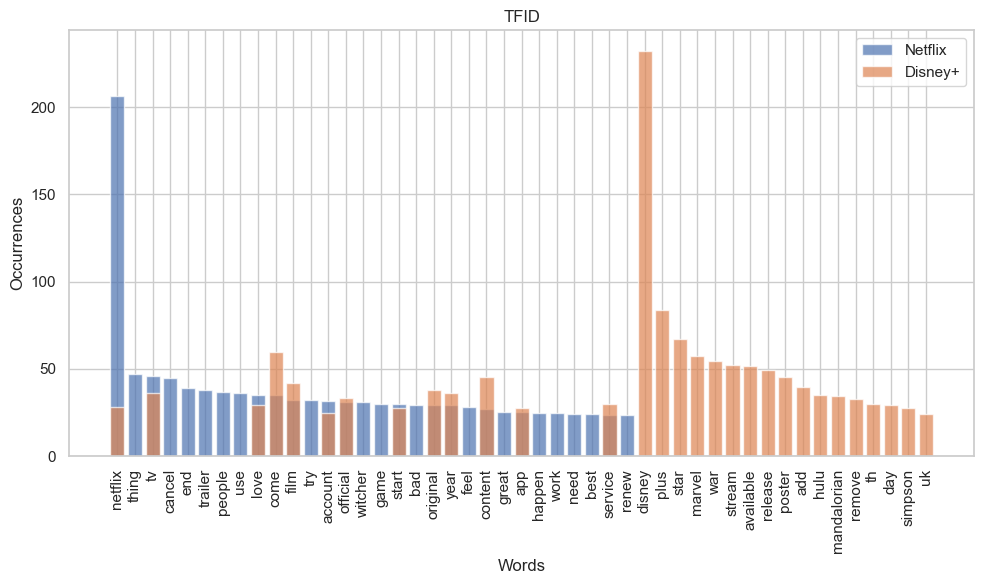

In [63]:
# Calculate the sum of word tfid after stopwords_enhanced
netflix_sum = tfid_unigrams_netflix_df.sum().sort_values(ascending=False).head(30)
disneyplus_sum = tfid_unigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(netflix_sum.index, netflix_sum.values, alpha=0.7, label='Netflix')
plt.bar(disneyplus_sum.index, disneyplus_sum.values, alpha=0.7, label='Disney+')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('TFID')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

* The two most obvious texts that differentiate the topics are Netflix and Disney as they are the names of the streaming companies themselves. It is noteable that the word 'netflix' appears in the disney subreddit topic.

* Now, let's look at the remaining words. For Disneyplus, the top words that are related to the shows are mandalorian, star, wars which implies the show Star Wars in disneyplus. The show simpson is also available in disneyplus.

* Marvel is also part of disney exclusively and hulu is another streaming service owned by Disney.


* For Netflix, there is not much top words that are related to the shows except for thing which may imply the show Stranger Things and witcher which is the show name itself on Netflix. 

* It is also noteable that the word 'cancel' is one of the Netflix top frequent word. This might be due to the crackdown of the password sharing that caused unhappiness to many Netflix subscribers. Source: https://sg.news.yahoo.com/netflix-the-most-frequently-canceled-streaming-service-survey-finds-193636053.html

* Other than that, the word 'original' is also seen in the chart as Netflix created many orginal contents. Sources: https://sg.news.yahoo.com/netflix-original-content-disney-and-apple-plus-230418533.html

## Bigrams

In [64]:
# Bigrams

#CountVectorizer
cvec_bigrams = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stopwords_enhanced,
                             ngram_range =(2, 2),
                            ) 

cvec_bigrams_netflix = cvec_bigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 1]['alltext'])


cvec_bigrams_netflix_df = pd.DataFrame(cvec_bigrams_netflix.todense(),
                              columns=cvec_bigrams.get_feature_names_out())


cvec_bigrams_disneyplus = cvec_bigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 0]['alltext'])


cvec_bigrams_disneyplus_df = pd.DataFrame(cvec_bigrams_disneyplus.todense(),
                                  columns=cvec_bigrams.get_feature_names_out())
    

            
#TfidfVectorizer
tfid_bigrams = TfidfVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = stopwords_enhanced,
                             ngram_range =(2, 2),
                            ) 

    
tfid_bigrams_netflix = tfid_bigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 1]['alltext'])

tfid_bigrams_netflix_df = pd.DataFrame(tfid_bigrams_netflix.todense(),
                              columns=tfid_bigrams.get_feature_names_out())


tfid_bigrams_disneyplus = tfid_bigrams.fit_transform(reddit_df[reddit_df['subreddit'] == 0]['alltext'])

tfid_bigrams_disneyplus_df = pd.DataFrame(tfid_bigrams_disneyplus.todense(),
                              columns=tfid_bigrams.get_feature_names_out())

In [65]:
# Check shape
print(f"Shape for netflix_df dataset; {cvec_bigrams_netflix.shape}")
print(f"Shape for netflix_df dataset; {tfid_bigrams_netflix.shape}")
print(f"Shape for disneyplus_df dataset; {cvec_bigrams_disneyplus.shape}")
print(f"Shape for disneyplus_df dataset; {tfid_bigrams_disneyplus.shape}")

Shape for netflix_df dataset; (3250, 61426)
Shape for netflix_df dataset; (3250, 61426)
Shape for disneyplus_df dataset; (3647, 52133)
Shape for disneyplus_df dataset; (3647, 52133)


### Bigrams after stopwords_enhanced
* CountVectorizer Unigrams
* TF-IDF Vectorizer Unigrams

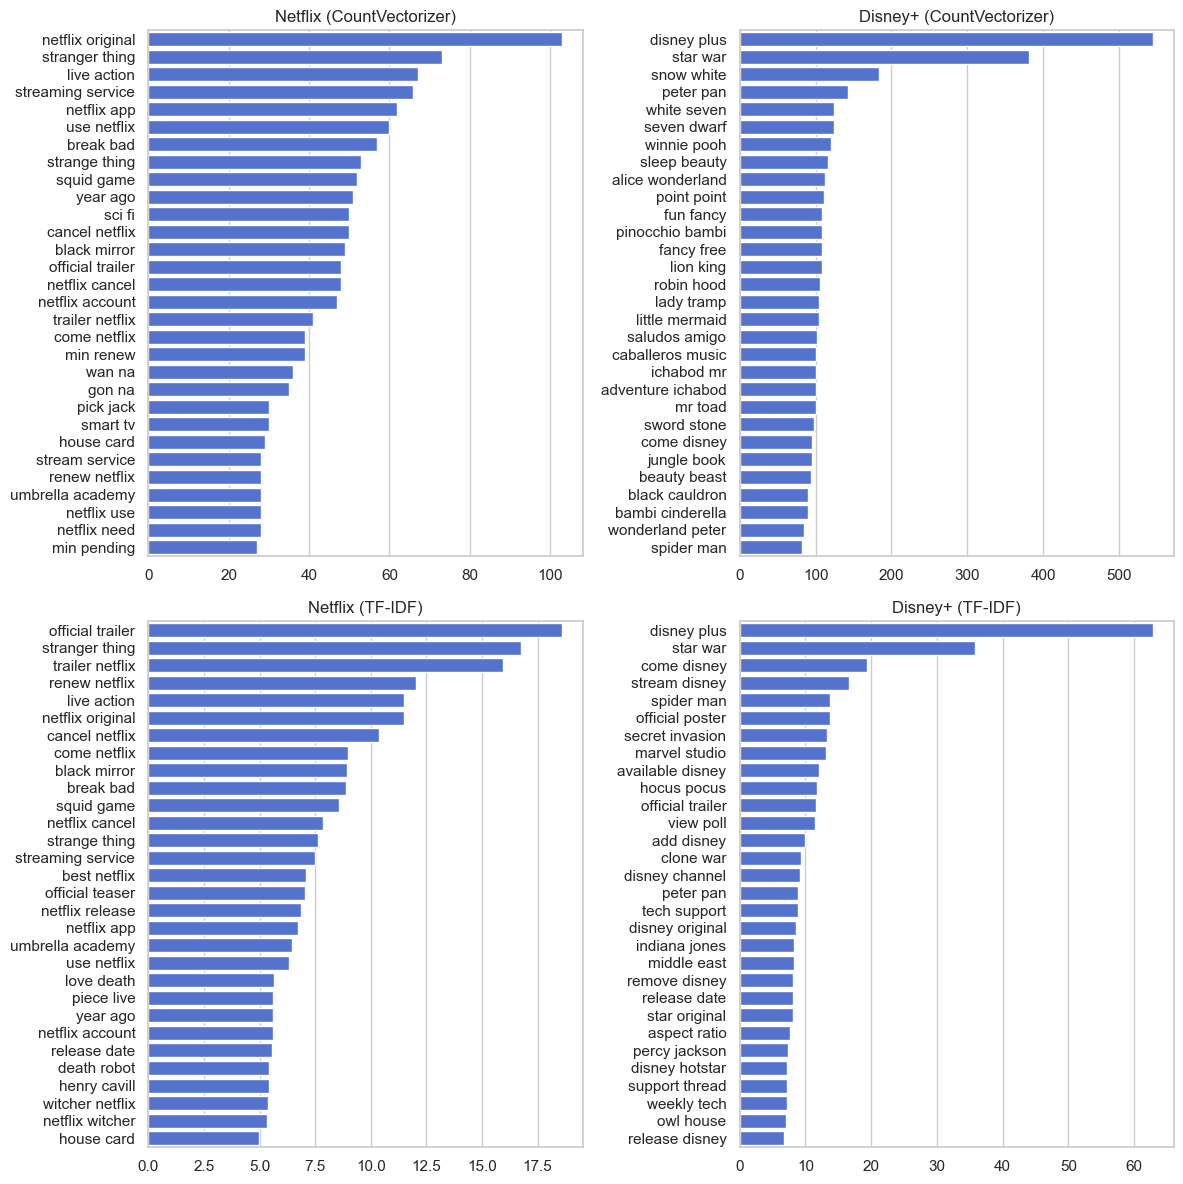

In [66]:
x = [
    cvec_bigrams_netflix_df.sum().sort_values(ascending=False).head(30),
    cvec_bigrams_disneyplus_df.sum().sort_values(ascending=False).head(30),
    tfid_bigrams_netflix_df.sum().sort_values(ascending=False).head(30),
    tfid_bigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)
]

y = [
    cvec_bigrams_netflix_df.sum().sort_values(ascending=False).head(30).index,
    cvec_bigrams_disneyplus_df.sum().sort_values(ascending=False).head(30).index,
    tfid_bigrams_netflix_df.sum().sort_values(ascending=False).head(30).index,
    tfid_bigrams_disneyplus_df.sum().sort_values(ascending=False).head(30).index
]

titles = [
    "Netflix (CountVectorizer)",
    "Disney+ (CountVectorizer)",
    "Netflix (TF-IDF)",
    "Disney+ (TF-IDF)"
]

create_subplots(x, y, titles)

### Superimpose Both Subreddit Topics after stopwords_enhanced: CountVectorizer Bigrams

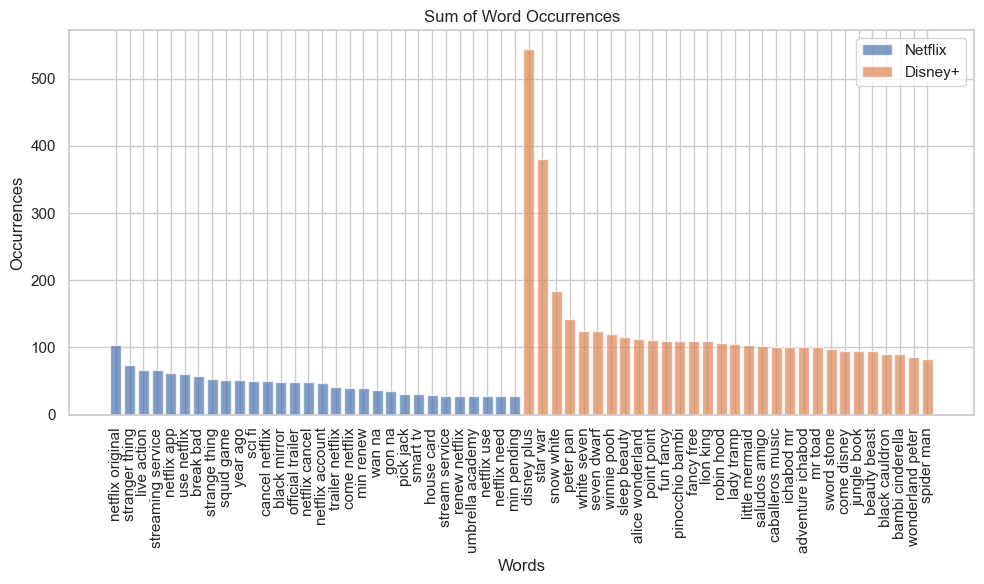

In [67]:
# Calculate the sum of word occurrences after stopwords_enhanced
netflix_sum = cvec_bigrams_netflix_df.sum().sort_values(ascending=False).head(30)
disneyplus_sum = cvec_bigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(netflix_sum.index, netflix_sum.values, alpha=0.7, label='Netflix')
plt.bar(disneyplus_sum.index, disneyplus_sum.values, alpha=0.7, label='Disney+')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('Sum of Word Occurrences')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Superimpose Both Subreddit Topics after stopwords_enhanced: TF-IDF Vectorizer Bigrams

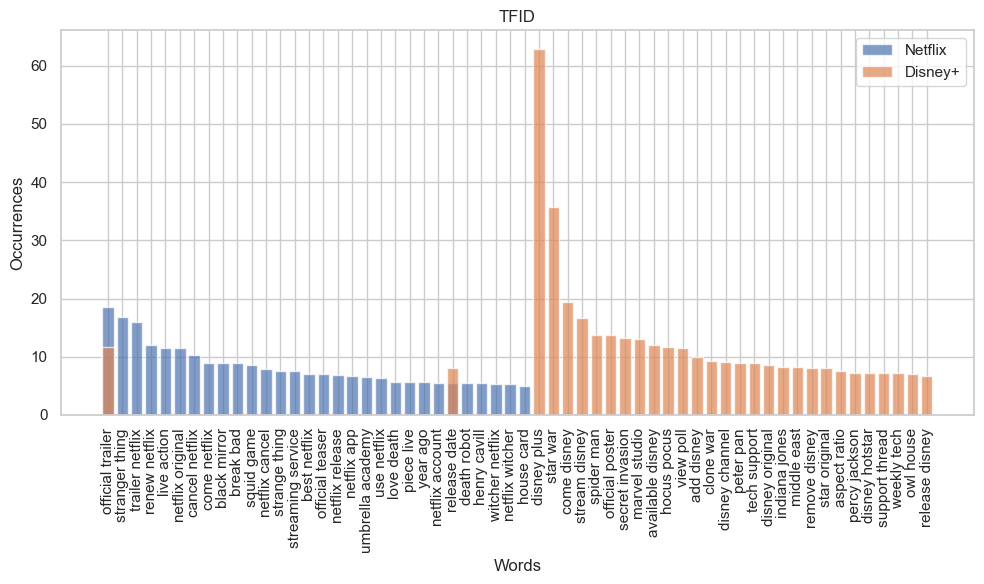

In [68]:
# Calculate the sum of word tfid after stopwords_enhanced
netflix_sum = tfid_bigrams_netflix_df.sum().sort_values(ascending=False).head(30)
disneyplus_sum = tfid_bigrams_disneyplus_df.sum().sort_values(ascending=False).head(30)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(netflix_sum.index, netflix_sum.values, alpha=0.7, label='Netflix')
plt.bar(disneyplus_sum.index, disneyplus_sum.values, alpha=0.7, label='Disney+')
plt.xlabel('Words')
plt.ylabel('Occurrences')
plt.title('TFID')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

* There are no overlapped words seen in the CountVectorizer Bigrams chart.
* In the TF-IDF Vectorizer Bigrams charts, there are overlapped words such as official trailer and release date. This is not surprising as both Netflix and Disneyplus are streaming companies and subreddit users will often share or discuss about the content in the official trailer and sharing the release date of the different shows.

* We can also see that the chart makes more sense and provides more context with words like netflix original, which mentioned earlier that Netflix produces alot of original content.
* Names of the shows with two words are also more obvious such as:
#### Netflix:
stranger thing, squid game, black mirror, break bad (short for breaking bad), umbrella academy

#### Disneyplus:
star wars, spider man, clone wars , secret invasion.

* There are also character names from shows such as snow white , lion king, winnie pooh.

* It is also noteworthy that many subreddit users discuss about the shows in Disneyplus that are already available years ago such as star wars , snow white, winnie the pooh, etc. Perhaps Netflix team can produce shows that are similar to these.

* Overall, running the machine learning model with Bigram as the hyperparamter in n-gram will enable the machine learning model to classify the two topics well.
* We can provide these top frequent words from disneyplus to the Netflix marketing team to engineer a marketing campaign to attract more subscriptions to Netflix. To get a clearer outcome whether or not these words are useful in classifying the two subreddit topics, different machine learning models will be used to evaluate with the F1 score metric.

### Save reddit_df as CSV for Modelling

In [69]:
# Save reddit_df as CSV after Lemmatisation
reddit_df.to_csv("reddit_df2.csv", index = False)

### Refer to 03_data_modelling